In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [4]:
FILEPATH='data/block_2010_data/nhgis0005_csv'
relevant_cols = ['GISJOIN', 'STATEA', 'COUNTYA', 'H7X001', 'H7X002', 'H7X003', 'H7X004', 
                               'H7X005', 'H7X006', 'H7X007', 'H7X008']
race_raw = pd.read_csv(f'{FILEPATH}/nhgis0005_ds172_2010_block.csv', 
                       usecols=relevant_cols, 
                       dtype={'GISJOIN': str, 'STATEA': str, 'COUNTYA': str})
column_mapper = dict(zip(relevant_cols, ['GISJOIN', 'state_fips', 'county_fips', 'total', 'white',
                                        'black', 'american_indian_al_native', 'asian', 
                                        'hawaiian_pac_islander', 'other', 'two_plus']))
race_raw.rename(columns=column_mapper, inplace=True)
print("Race data loaded.")
race_raw.set_index('GISJOIN', inplace=True)
race_raw

Race data loaded.


state_fips county_fips  total  white  black  \
GISJOIN                                                          
G06000104001001000         06         001      0      0      0   
G06000104001001001         06         001      0      0      0   
G06000104001001002         06         001      0      0      0   
G06000104001001003         06         001      0      0      0   
G06000104001001004         06         001      0      0      0   
...                       ...         ...    ...    ...    ...   
G42013300240022033         42         133     19     18      0   
G42013300240022034         42         133     48     48      0   
G42013300240022035         42         133     16     16      0   
G42013300240022036         42         133     44     35      2   
G42013300240022037         42         133     19     19      0   

                    american_indian_al_native  asian  hawaiian_pac_islander  \
GISJOIN                                                                       
G06000104001001000                          0      0                      0   
G06000104001001001                          0      0                      0   
G06000104001001002                          0      0                      0   
G06000104001001003                          0      0                      0   
G06000104001001004                          0      0                      0   
...                                       ...    ...                    ...   
G42013300240022033                          0      0                      0   
G42013300240022034                          0      0                      0   
G42013300240022035                          0      0                      0   
G42013300240022036                          0      0                      0   
G42013300240022037                          0      0                      0   

                    other  two_plus  
GISJOIN                              
G06000104001001000      0         0  
G06000104001001001      0         0  
G06000104001001002      0         0  
G06000104001001003      0         0  
G06000104001001004      0         0  
...                   ...       ...  
G42013300240022033      0         1  
G42013300240022034      0         0  
G42013300240022035      0         0  
G42013300240022036      0         7  
G42013300240022037      0         0  

[2699631 rows x 10 columns]

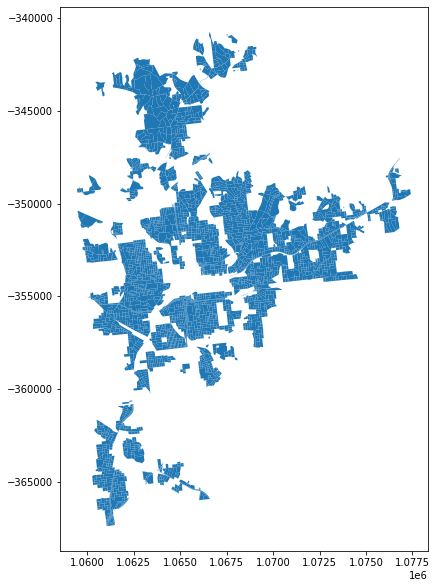

In [5]:
city_blocks = gpd.read_file(
    'data/block_2010_data/nhgis0005_shape/nhgis0005_shapefile_tl2010_130_block_2010/GA_block_2010.shp').set_index('GEOID10')
city_rl_cw = pd.read_csv('data/outputs/Atlanta_blocks_2010_crosswalk.csv', dtype={'block_id_2010': str}).set_index('block_id_2010')
city_blocks = city_blocks.join(city_rl_cw, how='outer').dropna().set_index('GISJOIN')
city_blocks.plot(figsize=(10,10))

In [6]:
city = city_blocks.join(race_raw, how='outer').dropna()

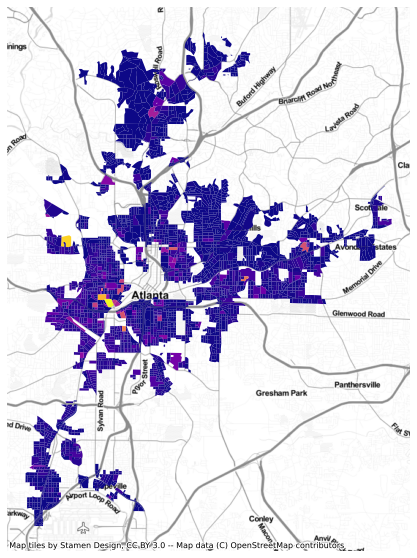

In [7]:
import contextily as ctx
def plot_map(df, column, figsize=(10,10), cmap='plasma'):
    ax = df.to_crs(epsg=3857).plot(figsize=figsize, cmap=cmap, column=column)
    ax.set_axis_off()
    ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

plot_map(city, 'black')

In [8]:
R = city.groupby('holc_id_uq').sum().filter(['total', 'white', 'black', \
    'american_indian_al_native', 'asian', 'hawaiian_pac_islander', \
    'hawaiian_pac_islander', 'other', 'two_plus'])

In [73]:
empty_districts = np.array(R.loc[(R.total == 0)].index)

array(['C74', 'D101', 'D104'], dtype=object)

In [42]:
race_matrix = city.filter(['total', 'white', 'black', 'american_indian_al_native', 'asian', 'hawaiian_pac_islander', 'other', 'two_plus', 'holc_id_uq', 'geometry'])
race_matrix.rename(columns={'holc_id_uq': 'partition'}, inplace=True)
# remove districts with population 0
race_matrix = race_matrix[~race_matrix['partition'].isin(empty_districts)]
race_matrix

total  white  black  american_indian_al_native  asian  \
GISJOIN                                                                     
G13008900201001016      0      0      0                          0      0   
G13008900201001017    134    130      0                          0      1   
G13008900201001018     77     69      6                          0      0   
G13008900201001019     44     42      0                          0      1   
G13008900201001020     58     56      2                          0      0   
...                   ...    ...    ...                        ...    ...   
G13012109800001038      0      0      0                          0      0   
G13012109800001039      0      0      0                          0      0   
G13012109800001040      0      0      0                          0      0   
G13012109800001041      0      0      0                          0      0   
G13012109800001042      0      0      0                          0      0   

                    hawaiian_pac_islander  other  two_plus partition  \
GISJOIN                                                                
G13008900201001016                      0      0         0        A7   
G13008900201001017                      0      0         3        A7   
G13008900201001018                      0      0         2        A7   
G13008900201001019                      0      0         1        A7   
G13008900201001020                      0      0         0        A7   
...                                   ...    ...       ...       ...   
G13012109800001038                      0      0         0       C72   
G13012109800001039                      0      0         0       C72   
G13012109800001040                      0      0         0       C72   
G13012109800001041                      0      0         0       C72   
G13012109800001042                      0      0         0       C72   

                                                             geometry  
GISJOIN                                                                
G13008900201001016  POLYGON ((1068795.295 -348363.945, 1068775.515...  
G13008900201001017  POLYGON ((1068738.944 -348302.783, 1068744.852...  
G13008900201001018  POLYGON ((1068706.259 -348247.260, 1068647.320...  
G13008900201001019  POLYGON ((1068437.777 -348296.334, 1068434.409...  
G13008900201001020  POLYGON ((1068681.548 -348808.789, 1068673.130...  
...                                                               ...  
G13012109800001038  POLYGON ((1061463.650 -367086.147, 1061446.372...  
G13012109800001039  POLYGON ((1061355.316 -367319.838, 1061357.047...  
G13012109800001040  POLYGON ((1061477.144 -367221.680, 1061455.189...  
G13012109800001041  POLYGON ((1061478.146 -367242.039, 1061454.423...  
G13012109800001042  POLYGON ((1061349.053 -367245.766, 1061305.264...  

[3506 rows x 10 columns]

In [10]:
def city_entropy(R, P):
    """
    Computes entropy of a city-region (see White, 1986).

    Parameters
    ----------
    R : numpy.ndarray
        i-by-j matrix, where i=districts and j=ethnicities.
    P : numpy.array
        i-length vector of the total population in a city-region.
    
    Returns
    -------
    int
        citywide segregation entropy score.
    """
    # define key terms in algorithm
    N = sum(P)
    i, j = R.shape
    R_prop = np.nan_to_num(np.apply_along_axis(lambda column: column / P, 0, R))
    r_hat = R.sum(axis=0) / N

    
    def entropy(x):
        """compute an entropy score with region ethnicity proportion vector x."""
        with np.errstate(divide='ignore'):
            vec = np.log(x)
        vec[np.isneginf(vec)] = 0 # fix special case where 0 * ln(0) = 0
        return (-1) * sum(x*vec)
    
    # compute district-level entropy scores
    h_i = list(map(entropy, R_prop))

    # compute city-wide entropy
    H_hat = entropy(r_hat)
    H_bar = sum((P/N) * h_i)
    
    return (H_hat - H_bar) / H_hat


In [11]:
def chain_to_entropy(chainobj, blocks):
    """
    Takes element in Markov Chain and computes entropy score using the partition map.
    Parameters
    ----------
    chainobj : gerrychain.partition.partition.Partition
        Partition object that dictates which elements belong to which partitions.
    blocks : geopandas.GeoDataFrame
        Dataframe containing the map's census blocks and associated race information.
    
    Returns
    -------
    int
        entropy score using the partition data from Markov Chain element.
    """
    # use partition parts and grouping to create R and P
    R = blocks.drop(columns=['geometry']).copy()
    R['partition'] = blocks.index.map(dict(chainobj.assignment))
    R = R.groupby('partition').sum()
    R, P = R.to_numpy()[:, 1:], R.to_numpy()[:, 0]

    return city_entropy(R, P)

In [43]:
def compute_total_pop(partition):
    global race_matrix
    R = race_matrix.drop(columns=['geometry']).copy()
    R['partition'] = race_matrix.index.map(dict(partition.assignment))
    return R.groupby('partition').sum()['total'].to_dict()

In [44]:
from gerrychain import (GeographicPartition, Partition, Graph, MarkovChain, proposals, updaters, constraints, accept)
from gerrychain.updaters import Tally
from gerrychain.constraints import Validator, LowerBound, UpperBound, WithinPercentRangeOfBounds
from gerrychain.proposals import recom, propose_chunk_flip, propose_random_flip
from gerrychain.accept import always_accept
from tqdm.notebook import tqdm
import networkx as nx

graph = Graph.from_geodataframe(race_matrix, adjacency='queen')

(1058546.848742942,
 1078311.9602717448,
 -368688.0350447231,
 -339429.34006718843)

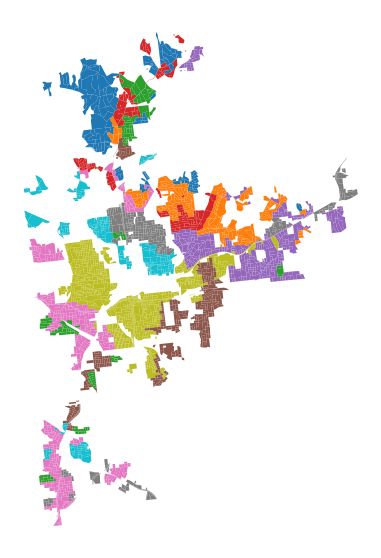

In [45]:
nx.set_node_attributes(graph, race_matrix['total'].to_dict(), name='population')
init_partition = Partition(graph, 
                    assignment=race_matrix.to_dict()['partition'],
                    updaters={'population' : Tally('population')})
init_partition.plot(figsize=(10,10))
plt.axis('off')

In [46]:
import seaborn as sns
from collections import Counter
plt.hist(list(init_partition['population'].values()), bins=100)
np.percentile(list(init_partition['population'].values()), [2.5, 97.5])
{key:value for (key, value) in init_partition['population'].items() if value == 0}
# this should output an empty dictionary. if not, do not run chain, remove these districts first

{}

In [58]:
mean_pop = lambda part: np.mean(list(part['population'].values()))
min_pop = lambda part: min(list(part['population'].values()))
sd_pop = lambda part: np.std(list(part['population'].values()))
mean_one_sd_up = mean_pop(init_partition) + (2/3)*sd_pop(init_partition)
mean_one_sd_down = mean_pop(init_partition) - (2/3)*sd_pop(init_partition)
mean_pop(init_partition), mean_one_sd_up, mean_one_sd_down, sd_pop(init_partition)

(1803.0094339622642, 3266.0877472810835, 339.9311206434452, 2194.6174699782287)

In [94]:
is_valid = Validator([LowerBound(min_pop, min_pop(init_partition) % 50), 
    UpperBound(mean_pop, mean_one_sd_up), 
    LowerBound(mean_pop, mean_one_sd_down),
    WithinPercentRangeOfBounds(sd_pop, 25)])
BURN_IN = 1000
STEP_COUNT = 1000000
CITY_NAME = 'Atlanta'
chunk_chain = MarkovChain(proposal=propose_chunk_flip, 
                    constraints=is_valid,
                    accept=always_accept, 
                    initial_state=init_partition, 
                    total_steps=STEP_COUNT + BURN_IN)
random_chain = MarkovChain(proposal=propose_random_flip, 
                    constraints=is_valid,
                    accept=always_accept, 
                    initial_state=init_partition, 
                    total_steps=STEP_COUNT + BURN_IN)
print('Prereqs created, Chunk flip chain running...')
# burn-in of 1000
iter(chunk_chain)
print("Burn-in:")
_ = [next(chunk_chain) for i in tqdm(range(BURN_IN))]
chunk_entropies = [chain_to_entropy(next(chunk_chain), race_matrix) for i in tqdm(range(STEP_COUNT))]
del chunk_chain
np.save(f"results/arrays/{CITY_NAME.lower()}_cf_{STEP_COUNT}.npy", chunk_entropies)

print('Random flip chain running...')
# burn-in of 1000
iter(random_chain)
print("Burn-in:")
_ = [next(random_chain) for i in tqdm(range(BURN_IN))]
random_entropies = [chain_to_entropy(next(random_chain), race_matrix) for i in tqdm(range(STEP_COUNT))]
del random_chain
np.save(f"results/arrays/{CITY_NAME.lower()}_rf_{STEP_COUNT}.npy", random_entropies)


Prereqs created, Chunk flip chain running...
Burn-in:



Random flip chain running...
Burn-in:


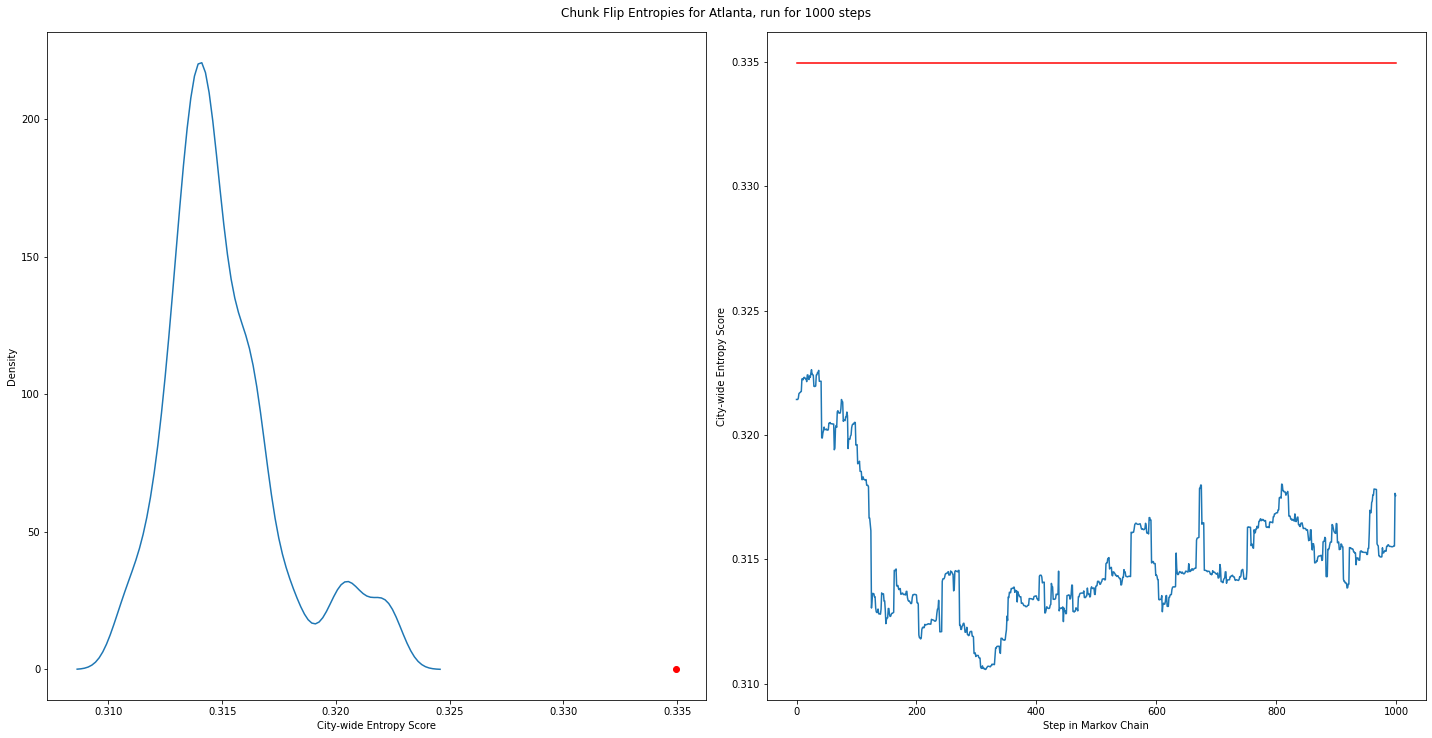

In [95]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.xlabel("City-wide Entropy Score")
plt.ylabel("Density")
sns.kdeplot(chunk_entropies)
plt.scatter(city_entropy(R.to_numpy()[:, 1:], R.to_numpy()[:, 0]), 0, c='r')

plt.subplot(1, 2, 2)
plt.xlabel("Step in Markov Chain")
plt.ylabel("City-wide Entropy Score")
plt.plot(chunk_entropies)
plt.plot(np.repeat(city_entropy(R.to_numpy()[:, 1:], R.to_numpy()[:, 0]), STEP_COUNT), c='r')

plt.suptitle(f"Chunk Flip Entropies for {CITY_NAME}, run for {STEP_COUNT} steps", y=1.02)
plt.tight_layout()
# plt.savefig(f"results/plots/{CITY_NAME.lower()}_cf_{STEP_COUNT}.png")

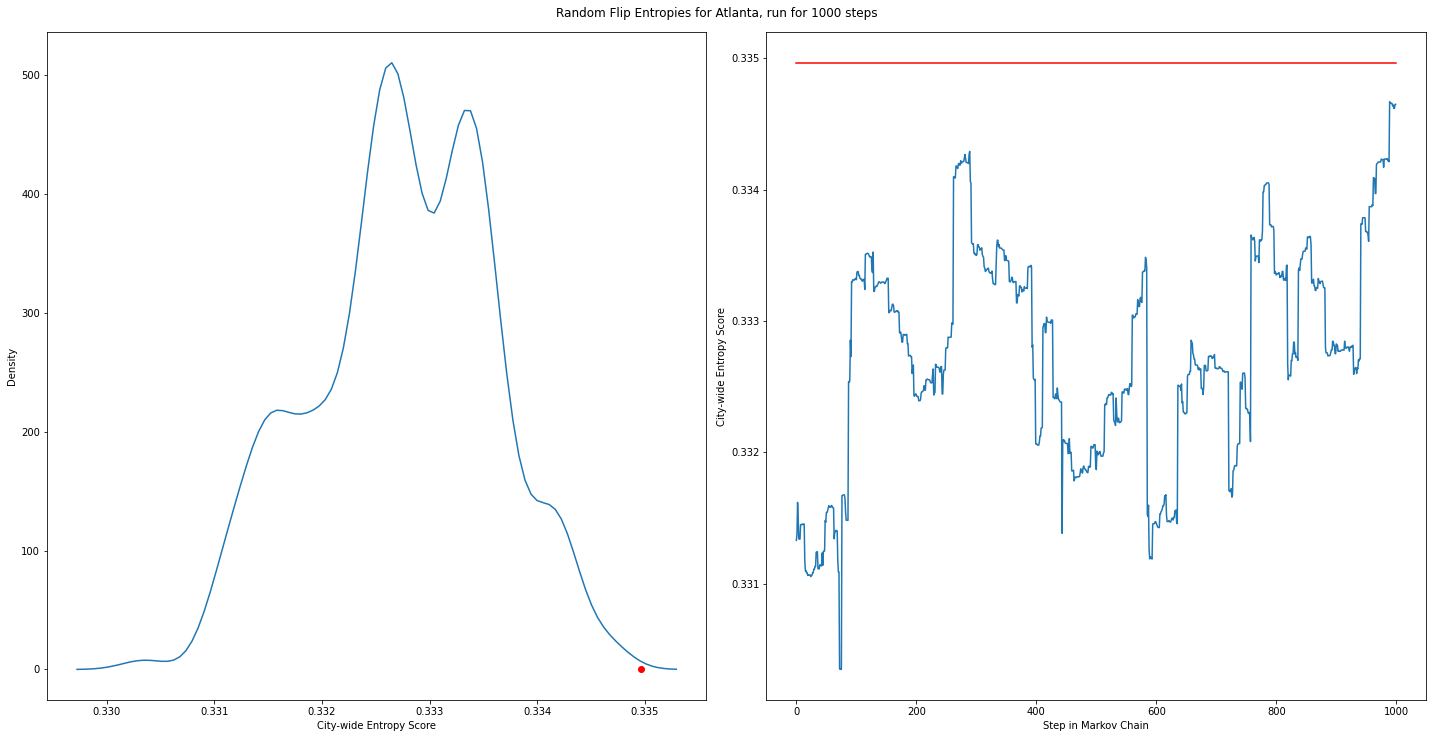

In [96]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.xlabel("City-wide Entropy Score")
plt.ylabel("Density")
sns.kdeplot(random_entropies)
plt.scatter(city_entropy(R.to_numpy()[:, 1:], R.to_numpy()[:, 0]), 0, c='r')

plt.subplot(1, 2, 2)
plt.xlabel("Step in Markov Chain")
plt.ylabel("City-wide Entropy Score")
plt.plot(random_entropies)
plt.plot(np.repeat(city_entropy(R.to_numpy()[:, 1:], R.to_numpy()[:, 0]), STEP_COUNT), c='r')

plt.suptitle(f"Random Flip Entropies for {CITY_NAME}, run for {STEP_COUNT} steps", y=1.02)
plt.tight_layout()
# plt.savefig(f"results/plots/{CITY_NAME.lower()}_rf_{STEP_COUNT}.png")